<a href="https://colab.research.google.com/github/atharvchothe/Machine-Learning/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 0 | Cost: 0.6931
Epoch 100 | Cost: 12.7303
Epoch 200 | Cost: 3.9278
Epoch 300 | Cost: 13.7736
Epoch 400 | Cost: 7.7494
Epoch 500 | Cost: 11.3461
Epoch 600 | Cost: 7.7607
Epoch 700 | Cost: 4.1737
Epoch 800 | Cost: 11.3671
Epoch 900 | Cost: 7.7643

Test Cost: 4.0067


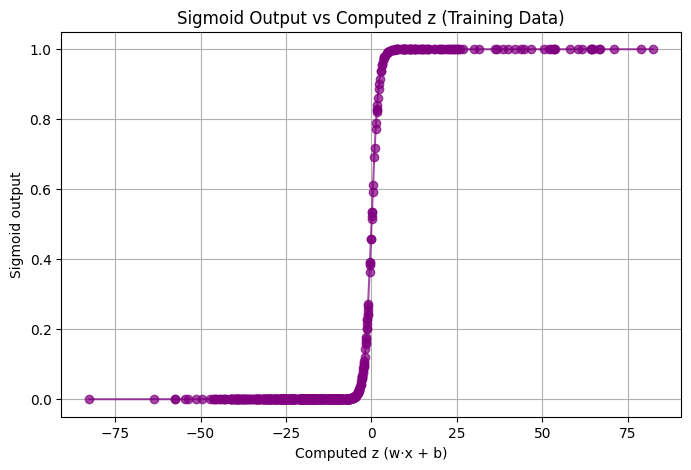

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

csv_url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

columns = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
    "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"
]

df = pd.read_csv(csv_url, names=columns)

X = df.drop(columns=["Outcome"]).values
Y = df["Outcome"].values

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

w = np.zeros(X_train.shape[1])
b = 0

learning_rate = 0.01
epochs = 1000

# Functions
def compute_z(w, b, X):
    return np.dot(w, X.T) + b

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(Y_true, Y_pred):
    m = len(Y_true)
    cost = - (1/m) * np.sum(Y_true*np.log(Y_pred + 1e-10) + (1 - Y_true)*np.log(1 - Y_pred + 1e-10))
    return cost

def compute_gradient(X, Y_true, Y_pred):
    m = len(Y_true)
    dw = (1/m) * np.dot(X.T, (Y_pred - Y_true))
    db = (1/m) * np.sum(Y_pred - Y_true)
    return dw, db

for epoch in range(epochs):
    z = compute_z(w, b, X_train)
    Y_pred = sigmoid(z)
    cost = compute_cost(Y_train, Y_pred)
    dw, db = compute_gradient(X_train, Y_train, Y_pred)

    w -= learning_rate * dw
    b -= learning_rate * db

    if epoch % 100 == 0:
        print(f"Epoch {epoch} | Cost: {cost:.4f}")

z_test = compute_z(w, b, X_test)
Y_pred_test = sigmoid(z_test)
test_cost = compute_cost(Y_test, Y_pred_test)
print(f"\nTest Cost: {test_cost:.4f}")

z_train = compute_z(w, b, X_train)
sigmoid_train = sigmoid(z_train)

sorted_indices = np.argsort(z_train)
z_sorted = z_train[sorted_indices]
sigmoid_sorted = sigmoid_train[sorted_indices]

plt.figure(figsize=(8,5))
plt.plot(z_sorted, sigmoid_sorted, marker='o', linestyle='-', color='purple', alpha=0.7)
plt.xlabel('Computed z (w·x + b)')
plt.ylabel('Sigmoid output')
plt.title('Sigmoid Output vs Computed z (Training Data)')
plt.grid(True)
plt.show()
